# Amazon Uk의 신발 제품 리뷰 데이터 감정 분석(Sentiment Analysis)

### [건국대학교 글로컬캠퍼스 컴퓨터공학과 202121859 이을호]

========================================================================

본 과제에서는 Amazon uk(영국)쇼핑몰의 신발 제품 판매 리뷰에 대한 긍정, 부정의 판별이 가능한 감정 분석 시스템 개발을 진행한다. 

모델의 구현은 하단의 과정을 순서로 개발을 진행한다.

1. 데이터 전처리 (결측치 처리, 노이즈 제거, 정규화 과정, 불용어 제거)

```데이터 전처리 과정에서 데이터의 구조를 확인하며, 신발 제품 별 리뷰 갯수, 실구매 여부, 동일 작성자 리뷰 갯수 확인을 진행함.```

```결측치 처리, 노이즈 제거, 불용어 제거 과정을 통해 전처리를 완료함.```

2. 모델 구현

```nltk vader 모델을 통해 감정 분석을 진행 후 데이터 프레임에 결과 저장```

3. 모델 학습 및 튜닝 (dataset을 train, test로 분할, 모델 학습 및 하이퍼파라미터 튜닝(grid search or random search)를 통한 교차 검증)

```감정 분석 결과를 logistic regression을 통해 데이터 셋을 train과 test로 분할 후 모델에 학습시키고 성능을 향상시키기 위해 grid search를 적용하여 하이퍼파라미터 튜닝을 진행하여 학습을 시킨다```

4. 모델 평가 (정확도, 정밀도, 재현율, F1 score, ROC-AUC 지표를 통한 모델 검증 및 overfitting, underfitting 여부 확인 및 해결 방법)

5. 시각화 및 보고 (모델이 출력한 결과 및 수치값을 matplotlib, Seaborn을 통한 시각화 진행(혼동 행렬 및 ROC 곡선 생성))

-> 상기 내용을 보고서로 작성하여 별도 첨부함.

========================================================================

- Python Version : Python 3.10.13

# 1. 데이터 전처리:

- 1. 결측치 제거
- 2. 데이터 프레임 정리
- 3. 노이즈 제거 (정규화 활용)
- 4. 토큰화 및 불용어

	데이터 정리 (노이즈 제거, 결측값 처리 등).
	텍스트 토큰화 및 불용어 제거.
	텍스트 정규화 (스테밍 또는 표제어 추출).
	+) 필요하다면 더 추가해야 할 수도 있음

In [2]:
# 필요 라이브러리 import

%pip install matplotlib # 시각화 목적 matplotlib 설치
%pip install pandas # pandas 설치
%pip install numpy # numpy 설치
%pip install seaborn # seaborn 설치

import matplotlib.pyplot as plt # 시각화 목적 matplotlib 설치
import seaborn as sns # seaborn 모듈 import
import numpy as np # numpy 모듈 import
import pandas as pd # pandas 모듈 import
import time # (작업 소요시간 계산) time 모듈 import
import ast # 구문 트리 파싱 및 분석에 사용하는 asr 모듈 import

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


## 1) 결측치 제거

In [3]:
# 데이터 읽어와 로딩 후 출력 진행

print("파일 읽기 실행 중입니다...\n")
start = time.time() # 로딩 시작 시간 저장
df = pd.read_csv('/workspaces/ml202401-final-LeeEulHo/amazon_uk_shoes_products_dataset_2021_12.csv') # 파일 경로 지정
end = time.time() # 로딩 종료 시간 저장
print("파일 로딩에 걸린 시간은 " + str(round(end - start, 2)) + " 초입니다.") # 걸린 시간 출력

df.head() # 읽은 데이터 프레임 상단만 출력

파일 읽기 실행 중입니다...

파일 로딩에 걸린 시간은 0.06 초입니다.


,url,product_name,reviewer_name,review_title,review_text,review_rating,verified_purchase,review_date,helpful_count,uniq_id,scraped_at
0,https://www.amazon.co.uk/dp/B07SBX32T5,Klasified Women's Transparent Clear Sneaker Sh...,Jocelyn McSayles,Love em,Love these. Was looking for converses and thes...,5.0,True,Reviewed in the United States on 2 June 2020,2 people found this helpful,36eae4e5-2894-5279-a0b7-d2b330e2b814,24/12/2021 02:26:25
1,https://www.amazon.co.uk/dp/B07SBX32T5,Klasified Women's Transparent Clear Sneaker Sh...,Kenia Rivera,The plastic ripped,"The shoes are very cute, but after the 2nd day...",2.0,True,Reviewed in the United States on 28 October 2021,NaN,f4778bb8-3070-5cb1-b5aa-ffce41a97b57,24/12/2021 02:26:25
2,https://www.amazon.co.uk/dp/B07SBX32T5,Klasified Women's Transparent Clear Sneaker Sh...,Chris Souza,Good quality,Good quality,5.0,True,Reviewed in the United States on 20 January 2021,NaN,db5a7525-d40b-5265-84d8-df4f29837a3b,24/12/2021 02:26:25
3,https://www.amazon.co.uk/dp/B07SBX32T5,Klasified Women's Transparent Clear Sneaker Sh...,Amazon Customer,Good,Great,5.0,True,Reviewed in the United States on 22 April 2021,NaN,75a42851-6462-54b5-988a-27d336221943,24/12/2021 02:26:25
4,https://www.amazon.co.uk/dp/B08SW434MG,"GUESS Women's Bradly Gymnastics Shoe, White, 7 UK",Graziella,PERFETTE!!,Ho scelto il modello bianco con rifinitura die...,5.0,True,Reviewed in Italy on 2 April 2021,2 people found this helpful,232dee43-849e-5d06-ba05-efb3f4814714,24/12/2021 02:26:25


In [4]:
# 결측치 확인 및 제거

df.isnull().sum() # 결측치 값이 존재하는 데이터 갯수 출력

url                     0
product_name            0
reviewer_name           0
review_title            1
review_text             9
review_rating           0
verified_purchase       0
review_date             0
helpful_count        4870
uniq_id                 0
scraped_at              0
dtype: int64

In [5]:
# helpful_count 열 제거

df = df.drop(["helpful_count"], axis=1)
df = df.dropna(axis=0) # 결측치 존재하는 행 제거

df.isnull().sum() # 결측치 여부 확인

url                  0
product_name         0
reviewer_name        0
review_title         0
review_text          0
review_rating        0
verified_purchase    0
review_date          0
uniq_id              0
scraped_at           0
dtype: int64

In [6]:
# 결측치 제거 후 총 데이터 갯수 확인

df.count() # 데이터 갯수 출력

url                  6813
product_name         6813
reviewer_name        6813
review_title         6813
review_text          6813
review_rating        6813
verified_purchase    6813
review_date          6813
uniq_id              6813
scraped_at           6813
dtype: int64

## 2) 데이터 프레임 정리

In [7]:
# 기존의 데이터 프레임에서 필요 없는 열을 삭제 진행

df = df.drop(["url", "verified_purchase", "uniq_id", "scraped_at", "review_date"], axis=1) # 불필요한 열 삭제
df.head() # 편집 결과 출력

,product_name,reviewer_name,review_title,review_text,review_rating
0,Klasified Women's Transparent Clear Sneaker Sh...,Jocelyn McSayles,Love em,Love these. Was looking for converses and thes...,5.0
1,Klasified Women's Transparent Clear Sneaker Sh...,Kenia Rivera,The plastic ripped,"The shoes are very cute, but after the 2nd day...",2.0
2,Klasified Women's Transparent Clear Sneaker Sh...,Chris Souza,Good quality,Good quality,5.0
3,Klasified Women's Transparent Clear Sneaker Sh...,Amazon Customer,Good,Great,5.0
4,"GUESS Women's Bradly Gymnastics Shoe, White, 7 UK",Graziella,PERFETTE!!,Ho scelto il modello bianco con rifinitura die...,5.0


## 3) 노이즈 제거 (정규식 활용)

In [8]:
import re # 정규식 import

def remove_noise(text): # 노이즈 제거 함수 정의
    clear_noise = re.sub(r'[^A-Za-z\s]', '', text) # 입력된 텍스트에 대해 영어와 공백을 제외한 모든 문자를 제거함
    return clear_noise

df['review_title'] = df['review_title'].apply(remove_noise) # 리뷰 제목 노이즈 제거
df['reviewer_name'] = df['reviewer_name'].apply(remove_noise) # 리뷰 내용 노이즈 제거

## 4) 토큰화 진행 (nltk 활용)

In [9]:
#nltk 관련 필요 모듈 import

%pip install nltk #pip를 통해 nltk 설치
import nltk as nltk # nltk import
from nltk.corpus import stopwords # 불용어 제거 목적 stopwords import
from nltk.sentiment.vader import SentimentIntensityAnalyzer # nltk의 VADER 감정 분석기 impot 진행
nltk.download('vader_lexicon') # VADER 모델의 감정 분석기에 필요한 어휘 자료를 다운로드

Note: you may need to restart the kernel to use updated packages.


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /home/codespace/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [10]:
# nltk의 tokenize 기능을 이용하여 리뷰 제목과 내용을 토큰화 진행 후 새로은 열을 만들어 각각 저장

from nltk.tokenize import word_tokenize  #nltk의 tokenize 기능 import

nltk.download('punkt') # tokenize에 필요한 punkt 다운로드

df["review_title_token"] = df.review_title.apply(word_tokenize) # review_title 내용을 tokenize 진행하여 review_title_token에 저장
df["review_text_token"] = df.review_text.apply(word_tokenize) # review_text 내용을 tokenize 진행하여 review_text_token에 저장

[nltk_data] Downloading package punkt to /home/codespace/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


## 5) 불용어 제거 (nltk 활용)

In [11]:
# stopword 리스트를 외부에서 가져와서 지금의 리뷰에서 존재하는 stopword를 제거하는 과정을 여기에서 진행함

nltk.download('stopwords') # 불용어 제거 기능을 사용하기 위해 stopwords를 다운로드

start = time.time()
cache = set(stopwords.words("english")) # stopword 단어 세팅을 영어로 지정

def remove_stopwords(review_tokens): # 불용어 제거 기능 함수 정의
    text = " ".join([word.lower() for word in review_tokens if word not in cache]) # 소문자 처리 후 불용어에 해당하는 것은 제거하고 아닌것은 공백으로 구분하여 저장
    return text

# Remove the stop words from both columns
df["review_title_token"] = df.review_title_token.apply(remove_stopwords) # review_title_token에 불용어 제거 진행 후 다시 저장
df["review_text_token"] = df.review_text_token.apply(remove_stopwords) # eview_text_token에 불용어 제거 진행 후 다시 저장

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/codespace/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [12]:
# 정리 완료한 데이터 프레임 상태 확인

df.head(10)

,product_name,reviewer_name,review_title,review_text,review_rating,review_title_token,review_text_token
0,Klasified Women's Transparent Clear Sneaker Sh...,Jocelyn McSayles,Love em,Love these. Was looking for converses and thes...,5.0,love em,love . was looking converses half price unique...
1,Klasified Women's Transparent Clear Sneaker Sh...,Kenia Rivera,The plastic ripped,"The shoes are very cute, but after the 2nd day...",2.0,the plastic ripped,"the shoes cute , 2nd day wearing tongue starte..."
2,Klasified Women's Transparent Clear Sneaker Sh...,Chris Souza,Good quality,Good quality,5.0,good quality,good quality
3,Klasified Women's Transparent Clear Sneaker Sh...,Amazon Customer,Good,Great,5.0,good,great
4,"GUESS Women's Bradly Gymnastics Shoe, White, 7 UK",Graziella,PERFETTE,Ho scelto il modello bianco con rifinitura die...,5.0,perfette,ho scelto il modello bianco con rifinitura die...
5,"GUESS Women's Bradly Gymnastics Shoe, White, 7 UK",Francesca,delusione,Sono solita comprare scarpe Guess e non ho mai...,1.0,delusione,sono solita comprare scarpe guess e non ho mai...
6,"GUESS Women's Bradly Gymnastics Shoe, White, 7 UK",Cliente,Molto belle,"Le scarpe sono molto belle, calzano perfettamente",5.0,molto belle,"le scarpe sono molto belle , calzano perfettam..."
7,"GUESS Women's Bradly Gymnastics Shoe, White, 7 UK",Cliente Amazon,Molto carine e comode,Semplicemente perfette. Io uso plantari su mis...,5.0,molto carine e comode,semplicemente perfette . io uso plantari su mi...
8,"GUESS Women's Bradly Gymnastics Shoe, White, 7 UK",Marcella,Bellissimepeccato per il numero,"Le scarpe sono bellissime, arrivate in perfett...",5.0,bellissimepeccato per il numero,"le scarpe sono bellissime , arrivate perfetto ..."
9,"GUESS Women's Bradly Gymnastics Shoe, White, 7 UK",Giuseppe,Scarpe ben realizzate venditore ottimo,Le scarpe sono ben fatte e il venditore molto ...,5.0,scarpe ben realizzate venditore ottimo,le scarpe sono ben fatte e il venditore molto ...


# 2. 모델 구현:
	수업에서 활용한 모델을 적용 (nltk의 vader 모델을 통한 감정 분석 데이터 활용 logistic regression 진행)

### 1) nltk의 vader 모델을 통한 감정 분석 진행 및 데이터 저장

In [13]:
# vader 모델을 감정 분석기로 초기화 진행 후 감정 분석 기능 함수 생성

vader_sentiment = SentimentIntensityAnalyzer() # VADER 감정 분석기를 초기화

def calc_sentiment(review): # 감정 분석 함수 정의
    return vader_sentiment.polarity_scores(review)["compound"] # 모든 리뷰 감정 분석 진행

In [14]:
# logistic regression 적용을 위한 값 변환

def change_to_binary(sentiment_score): # 이진 값으로 감정 분석 결과를 변경함
    if sentiment_score >= 0.1:
        return 1  # 긍정 감정
    else:
        return 0  # 부정 감정

In [15]:
# vader 모델을 통한 감정 분석 도출 및 데이터 프레임에 계산 결과 추가 (logistic regression을 사용하기 위해 결과 값을 0 : 부정, 1 : 긍정으로 변환함)

print("리뷰 제목과 리뷰 내용 감정 분석 결과 데이터프레임에 추가\n")
start = time.time()
df["review_title_sentiment_score"] = df.review_title.apply(calc_sentiment).round(2) # 감정 분석 결과값을 소수점 두자리수까지 반올림해서 저장함
df["review_text_sentiment_score"] = df.review_text.apply(calc_sentiment).round(2) # 감정 분석 결과값을 소수점 두자리수까지 반올림해서 저장함

end = time.time()
print("감정 분석 계산 시간 :  " + str(round(end - start, 2)) + " 초 소요")

리뷰 제목과 리뷰 내용 감정 분석 결과 데이터프레임에 추가

감정 분석 계산 시간 :  2.77 초 소요


In [16]:
# 이진 값으로 변환 진행

df["review_title_sentiment_score"] = df.review_title_sentiment_score.apply(change_to_binary)
df["review_text_sentiment_score"] = df.review_text_sentiment_score.apply(change_to_binary)

In [17]:
# 준비 완료된 데이터를 데이터 프레임으로 편집

df_review = df[['product_name', 'review_text_token', 'review_text_sentiment_score']]
df_review

,product_name,review_text_token,review_text_sentiment_score
0,Klasified Women's Transparent Clear Sneaker Sh...,love . was looking converses half price unique...,1
1,Klasified Women's Transparent Clear Sneaker Sh...,"the shoes cute , 2nd day wearing tongue starte...",1
2,Klasified Women's Transparent Clear Sneaker Sh...,good quality,1
3,Klasified Women's Transparent Clear Sneaker Sh...,great,1
4,"GUESS Women's Bradly Gymnastics Shoe, White, 7 UK",ho scelto il modello bianco con rifinitura die...,0
...,...,...,...
6818,"Clarks Vennor Wing, Men’s Low-Top Sneakers, Bl...","schicker schuh , läuft sich gut .",0
6819,"Clarks Vennor Wing, Men’s Low-Top Sneakers, Bl...",mieux que je ne l'imaginais . très bonne taill...,0
6820,"Rohde Men's Tivoli-H Mule, 82 Anthracite, 12.5 UK",habe sie als geschenk gekauft und sie sind seh...,1
6821,"Rohde Men's Tivoli-H Mule, 82 Anthracite, 12.5 UK",trage diese hausschuhe fast zwei monate jeden ...,0


# 3. 모델 학습 및 튜닝:
	데이터셋을 학습 및 테스트 세트로 분할.
	모델 학습 및 하이퍼파라미터 튜닝 (예: 그리드 서치 또는 랜덤 서치 사용).
	교차 검증과 같은 기술을 사용하여 견고성 보장.

### 1) 필요 모듈 설치


In [18]:
# 필요 모듈 설치

import pandas as pd
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import confusion_matrix, classification_report

### 2) 데이터 지정 및 감정 분석 데이터 벡터화 진행

약 11분 정도 소요

In [19]:
# 데이터 지정
x = df['review_text_token']
y = df['review_text_sentiment_score']

# TF-IDF 벡터화
vectorizer = TfidfVectorizer(max_features=1000)
x = vectorizer.fit_transform(df['review_text_token'])

### 3) train data, test data로 각각 분할

In [20]:
# 학습 데이터와 테스트 데이터로 분할 진행
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

### 4) logistic Regression 모델 초기화 및 그리드 서치 활용 최적 모델 출력

하단의 작업은 10분 정도 소요됨

In [21]:
# Logistic Regression 모델 초기화
model = LogisticRegression()

# 하이퍼파라미터 그리드 설정
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}

# 그리드 서치를 사용하여 최적의 하이퍼파라미터 탐색
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')
grid_search.fit(x_train, y_train)

# 최적의 모델 및 하이퍼파라미터 출력
print("Best parameters:", grid_search.best_params_)
print("Best cross-validation score:", grid_search.best_score_)

Best parameters: {'C': 10}
Best cross-validation score: 0.8867889908256881


### 5) 위에서 찾은 최적의 모델을 활용하여 학습 및 예측 진행

In [22]:
# 최적의 모델을 사용하여 전체 학습 데이터에 대해 학습
best_model = grid_search.best_estimator_
best_model.fit(x_train, y_train)

# 테스트 데이터에 대해 예측
y_pred = best_model.predict(x_test)

# 4. 모델 평가:
	정확도, 정밀도, 재현율, F1 점수 및 ROC-AUC와 같은 지표를 사용하여 모델 평가.
	오버피팅과 언더피팅을 논의하고 이를 해결하는 방법 학습.

In [23]:
# 정확도 평가
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# 정밀도 평가
precision = precision_score(y_test, y_pred, average='weighted')
print("Precision:", precision)

# 재현율 평가
recall = recall_score(y_test, y_pred, average='weighted')
print("Recall:", recall)

# F1 점수 평가
f1 = f1_score(y_test, y_pred, average='weighted')
print("F1 Score:", f1)

# 혼동 행렬 출력
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# 분류 보고서 출력
class_report = classification_report(y_test, y_pred)
print("Classification Report:")
print(class_report)

Accuracy: 0.8892149669845928
Precision: 0.8896068492093696
Recall: 0.8892149669845928
F1 Score: 0.8893294648740914
Confusion Matrix:
[[533  69]
 [ 82 679]]
Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.89      0.88       602
           1       0.91      0.89      0.90       761

    accuracy                           0.89      1363
   macro avg       0.89      0.89      0.89      1363
weighted avg       0.89      0.89      0.89      1363



# 5. 시각화 및 보고: (적절한 것을 골라서 쓰고, 추가할 것이 있으면 추가하라)
	Matplotlib 라이브러리를 사용하여 결과 시각화 진행
	혼동 행렬 및 ROC 곡선 생성

### 1) 혼동 행렬 생성 및 출력

In [27]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[533,  69],
       [ 82, 679]])

### 2) matplotlib를 사용하여 ROC 곡선 생성

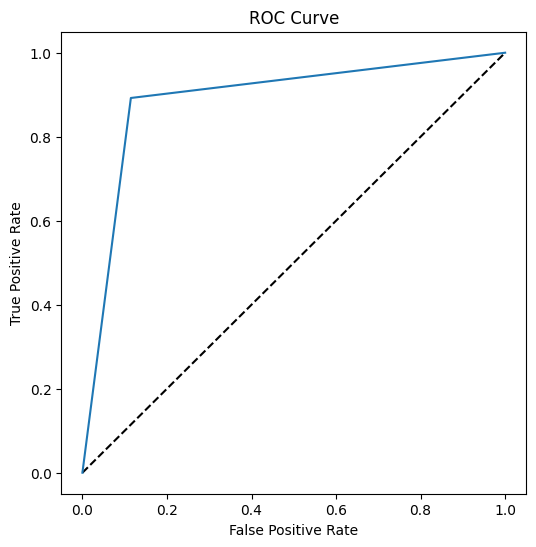

In [26]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

# calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

# plot ROC curve
fig = plt.figure(figsize=(6, 6))
# Plot the diagonal 50% line
plt.plot([0, 1], [0, 1], 'k--')
# Plot the FPR and TPR achieved by our model
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()